# Planar data classification with one hidden layer


1-Packages


In [1]:
#Packages import
import numpy as np
import matplotlib.pyplot as plt
from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary,sigmoid,load_planar_dataset,load_extra_datasets
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

2-Datasets


In [2]:
#First,let's get  the dataset you work on. 
X,Y=load_planar_dataset()

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

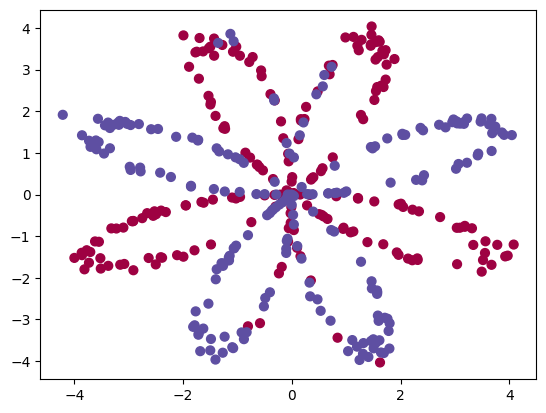

In [3]:
#Visualize the data:
plt.scatter(X[0,:],X[1,:],c=Y,s=40,cmap=plt.cm.Spectral)

In [4]:
shape_X=X.shape
shape_Y=Y.shape
m=(X.size)/(shape_X[0])  #training set size
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


3-Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [5]:
clf=sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)


d:\SETUP\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


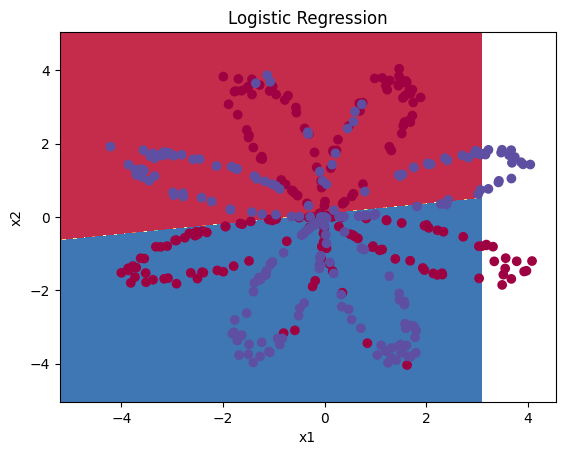

In [6]:
#Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x),X,Y)
plt.title("Logistic Regression")

#Print accuracy
LR_predictions=clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

4-Neural network model
Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

4.1-Defining the neural network structure

Exercise: Define three variables: - n_x: the size of the input layer - n_h: the size of the hidden layer (set this to 4) - n_y: the size of the output layer

In [7]:
#GRADED_FUNCTIONS: Layer_sizes
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    """
    n_x=X.shape[0] #size_of_input_layer
    n_h=4
    n_y=Y.shape[0] #size_of_output_layer
    return (n_x,n_h,n_y)


In [8]:
X_assess,Y_assess=layer_sizes_test_case()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


4.2- Initialize the model's parameters

In [9]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2) # we set up a seed so that your output matches ours although the initialization is random.
    W1=np.random.randn(n_h,n_x)*0.01
    #This function generate a matrix of shape (n_h,n_x)
    b1=np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h) * 0.01
    b2 = np.zeros((n_y,1))

    assert (W1.shape==(n_h,n_x))
    assert (b1.shape==(n_h,1))
    assert (W2.shape==(n_y,n_h))
    assert (b2.shape==(n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [10]:
n_x,n_h,n_y=initialize_parameters_test_case()
parameters=initialize_parameters(n_x,n_h,n_y)
print('W1= '+str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1= [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


4.3-The loop

Question: Implement forward_propagation()

Instructions:

1.Look above at the mathematical representation of your classifier.

+)You can use the function sigmoid(). It is built-in (imported) in the notebook.

+)You can use the function np.tanh(). It is part of the numpy library.

+)The steps you have to implement are:

+)Retrieve each parameter from the dictionary "parameters" (which is the output of initialize_parameters()) by using parameters[".."].

Values needed in the backpropagation are stored in "cache". The cache will be given as an input to the backpropagation function.


In [11]:
#GRADED_FUCNTION:  forward_propagation
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """

    # Retrieve each parameter from the dictionary "parameters"
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]


    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)

    assert(A2.shape==(1,X.shape[1]))
    # Values needed in the backpropagation are stored in "cache". This will be given as an input to the backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [12]:
X_assess,parameters=forward_propagation_test_case()
A2,cache=forward_propagation(X_assess,parameters)

# Note: we use the mean here just to make sure that your output matches ours. 
print(np.mean(cache['Z1']) ,np.mean(cache['A1']),np.mean(cache['Z2']),np.mean(cache['A2']))

0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198


In [13]:
# GRADED FUNCTION: compute_cost

def compute_cost(A2, Y, parameters):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    parameters -- python dictionary containing your parameters W1, b1, W2 and b2
    [Note that the parameters argument is not used in this function, 
    but the auto-grader currently expects this parameter.
    Future version of this notebook will fix both the notebook 
    and the auto-grader so that `parameters` is not needed.
    For now, please include `parameters` in the function signature,
    and also when invoking this function.]
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """

    m=Y.shape[1]  #number of examples
    #Compute the cross-entropy cost

    logprobs=np.multiply(Y ,np.log(A2)) + np.multiply((1-Y), np.log(1-A2))
    cost=(-1/m)*np.sum(logprobs)

    cost=float(np.squeeze(cost))
    assert(isinstance(cost,float))
    return cost
    

In [14]:
A2,Y_assess,parameters=compute_cost_test_case()
print("cost = " + str(compute_cost(A2, Y_assess, parameters)))

cost = 0.6930587610394646


Question: Implement the function backward_propagation().

Instructions: Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.

In [15]:
def backward_propagation(parameters,cache,X,Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m=X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]

    # Retrieve also A1 and A2 from dictionary "cache".
    A1=cache["A1"]
    A2=cache["A2"]
    Z1=cache["Z1"]
    Z2=cache["Z2"]

    # Backward propagation: calculate dW1, db1, dW2, db2.
    dZ2=A2-Y
    dW2=(1/m)*np.dot(dZ2,A1.T)
    db2 = (1/m) *(np.sum(dZ2,axis=1,keepdims=True))
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads




In [16]:
parameters, cache, X_assess, Y_assess = backward_propagation_test_case()

grads = backward_propagation(parameters, cache, X_assess, Y_assess)
print ("dW1 = "+ str(grads["dW1"]))
print ("db1 = "+ str(grads["db1"]))
print ("dW2 = "+ str(grads["dW2"]))
print ("db2 = "+ str(grads["db2"]))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


In [17]:
def update_parameters(parameters, grads, learning_rate):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

     # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    ## END CODE HERE ###

    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads,1.2)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


4.4-Integrate 4.1,4.2,4.3 in nn_model()

In [19]:
def nn_model(X,Y,n_h,learning_rate,num_iterations=10000,print_cost=False):
    n_x=layer_sizes(X,Y)[0]
    n_y = layer_sizes(X, Y)[2]

    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)
    for i in range(0, num_iterations):
        #Forward propagation
        A2,cache=forward_propagation(X,parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters

In [20]:
X_assess, Y_assess = nn_model_test_case()
parameters = nn_model(X_assess, Y_assess, 4, 1.02,num_iterations=10000, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

Cost after iteration 0: 0.692739
Cost after iteration 1000: 0.000257
Cost after iteration 2000: 0.000127
Cost after iteration 3000: 0.000084
Cost after iteration 4000: 0.000063
Cost after iteration 5000: 0.000050
Cost after iteration 6000: 0.000042
Cost after iteration 7000: 0.000036
Cost after iteration 8000: 0.000031
Cost after iteration 9000: 0.000028
W1 = [[-0.65400312  1.21068652]
 [-0.75688005  1.38443617]
 [ 0.57449374 -1.0957478 ]
 [ 0.76242342 -1.40517716]]
b1 = [[ 0.2841426 ]
 [ 0.34699428]
 [-0.23981061]
 [-0.35351855]]
W2 = [[-2.42329584 -3.22274999  1.97978376  3.31771228]]
b2 = [[0.20282644]]


4.5-Prediction

Question: Use your model to predict by building predict(). Use forward propagation to predict results

As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: X_new = (X > threshold)

In [21]:
#GRADED_FUNCTION: predict
def predict(parameters,X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

In [22]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


Cost after iteration 0: 0.693048
Cost after iteration 1000: 0.288083
Cost after iteration 2000: 0.254385
Cost after iteration 3000: 0.233864
Cost after iteration 4000: 0.226792
Cost after iteration 5000: 0.222644
Cost after iteration 6000: 0.219731
Cost after iteration 7000: 0.217504
Cost after iteration 8000: 0.219404
Cost after iteration 9000: 0.218544


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

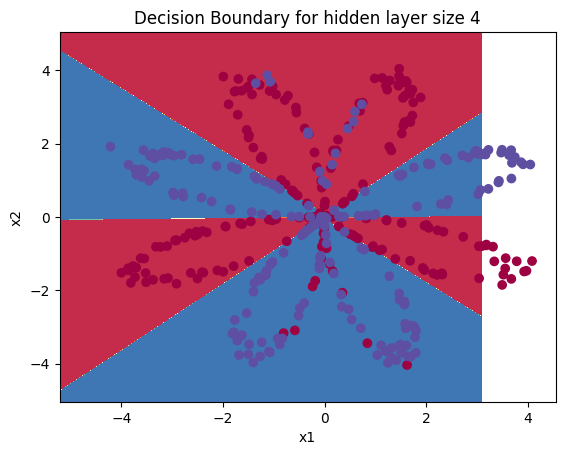

In [23]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))

In [24]:
# Print accuracy
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 90%


Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression.

Now, let's try out several hidden layer sizes

4.6 - Tuning hidden layer size (optional/ungraded exercise)

Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %


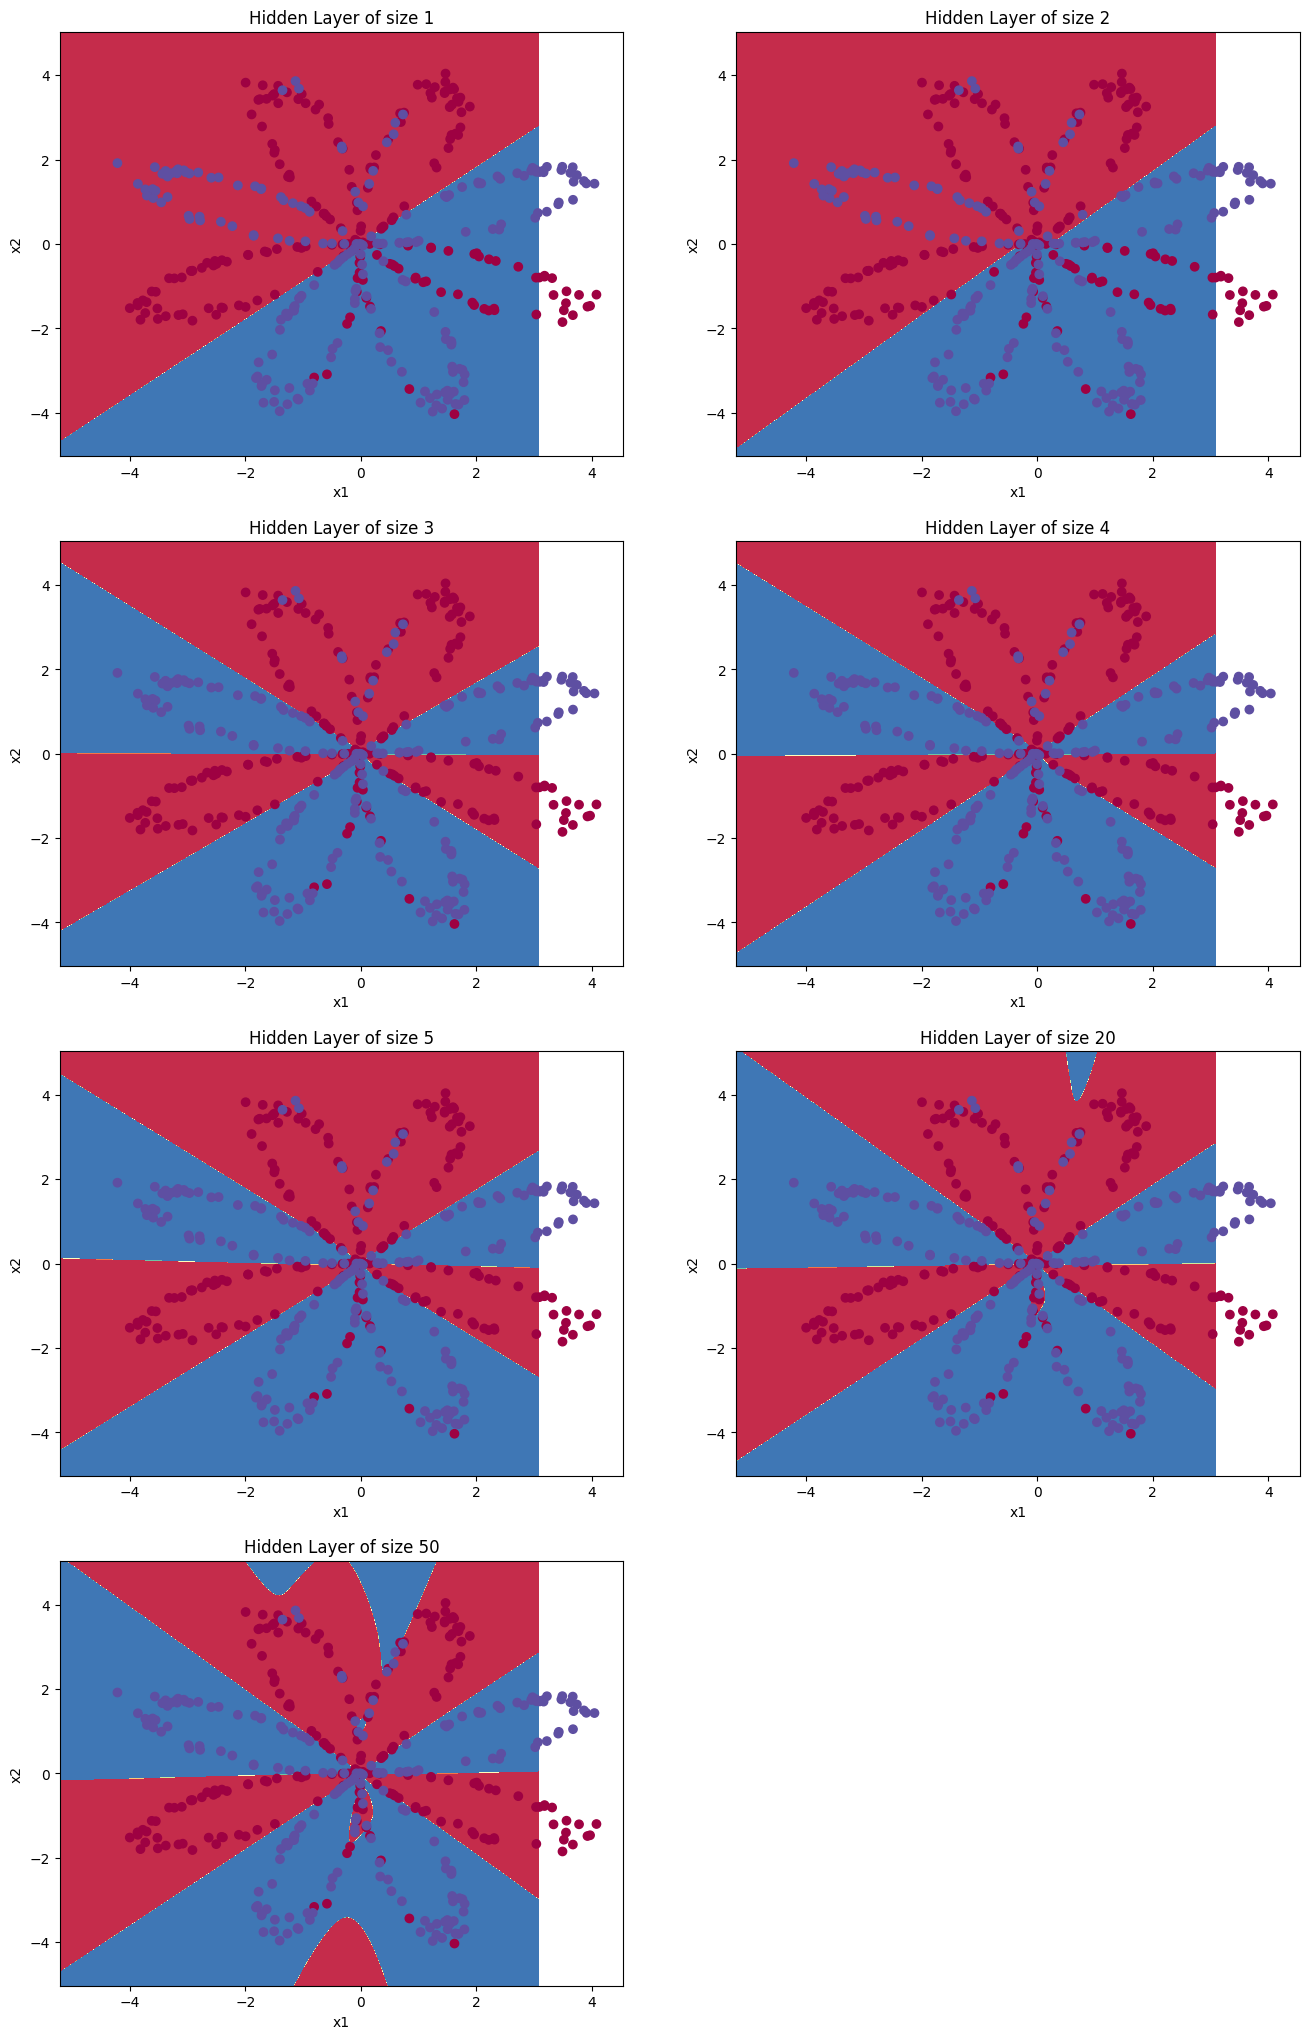

In [25]:
# This may take about 2 minutes to run

plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h,1.2, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

5) Performance on other datasets

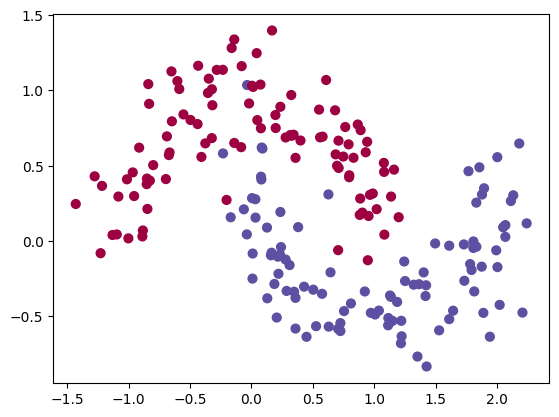

In [26]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "noisy_moons"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y%2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);